<a href="https://colab.research.google.com/github/MuayThaiLegz/Class-practice/blob/master/workingcv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Working object detection

In [ ]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
    'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack',
    'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

In [ ]:
import torch
from torchvision.models.detection import retinanet_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

model = retinanet_resnet50_fpn(pretrained=True)
model.eval()

image_path = 'Picture1.png' # use any image in you local folders
image = Image.open(image_path)
if image.mode != 'RGB':
    image = image.convert('RGB')
image_tensor = F.to_tensor(image).unsqueeze(0)

with torch.no_grad():
    predictions = model(image_tensor)

fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

score_threshold = 0.6

scores = predictions[0]['scores'].detach().numpy()
boxes = predictions[0]['boxes'].detach().numpy()
labels = predictions[0]['labels'].detach().numpy()
for score, box, label in zip(scores, boxes, labels):
    if score > score_threshold:

        label_name = COCO_INSTANCE_CATEGORY_NAMES[label]
        print(f"{label_name} : {score:.2f} : {box.astype(int).tolist()}")

        rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                 linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

output_image_path = 'imagenew.jpg'
plt.savefig(output_image_path)
plt.show()


person : 0.92 : [209, 156, 418, 530]
person : 0.90 : [79, 201, 233, 504]
dog : 0.65 : [188, 340, 244, 404]
bed : 0.64 : [334, 102, 408, 169]


In [ ]:
!pip install tensorflow==1.15
!pip install imageai --upgrade


ERROR: Could not find a version that satisfies the requirement tensorflow==1.15 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0)
ERROR: No matching distribution found for tensorflow==1.15
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 2.3 MB/s eta 0:00:00


In [ ]:
from imageai.Detection import ObjectDetection
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches


detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()

model_path = '/content/drive/MyDrive/tfvisionModels/retinanet_resnet50_fpn_coco-eeacb38b.pth'
detector.setModelPath(model_path)
detector.loadModel()

input_path = "Picture1.png"
output_path = "Picture1ew.png"

detections = detector.detectObjectsFromImage(input_image=input_path, output_image_path=output_path, minimum_percentage_probability=30)


image = Image.open(output_path)
plt.figure(figsize=(12, 12))
plt.imshow(image)


for eachObject in detections:
    box_points = eachObject["box_points"]
    plt.gca().add_patch(patches.Rectangle((box_points[0], box_points[1]), box_points[2] - box_points[0], box_points[3] - box_points[1], linewidth=2, edgecolor='red', facecolor='none'))
    plt.text(box_points[0], box_points[1], eachObject["name"] + " : " + str(eachObject["percentage_probability"]), color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

plt.show()


In [2]:
pip install yolov5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.4/953.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.0/646.0 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 91.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.

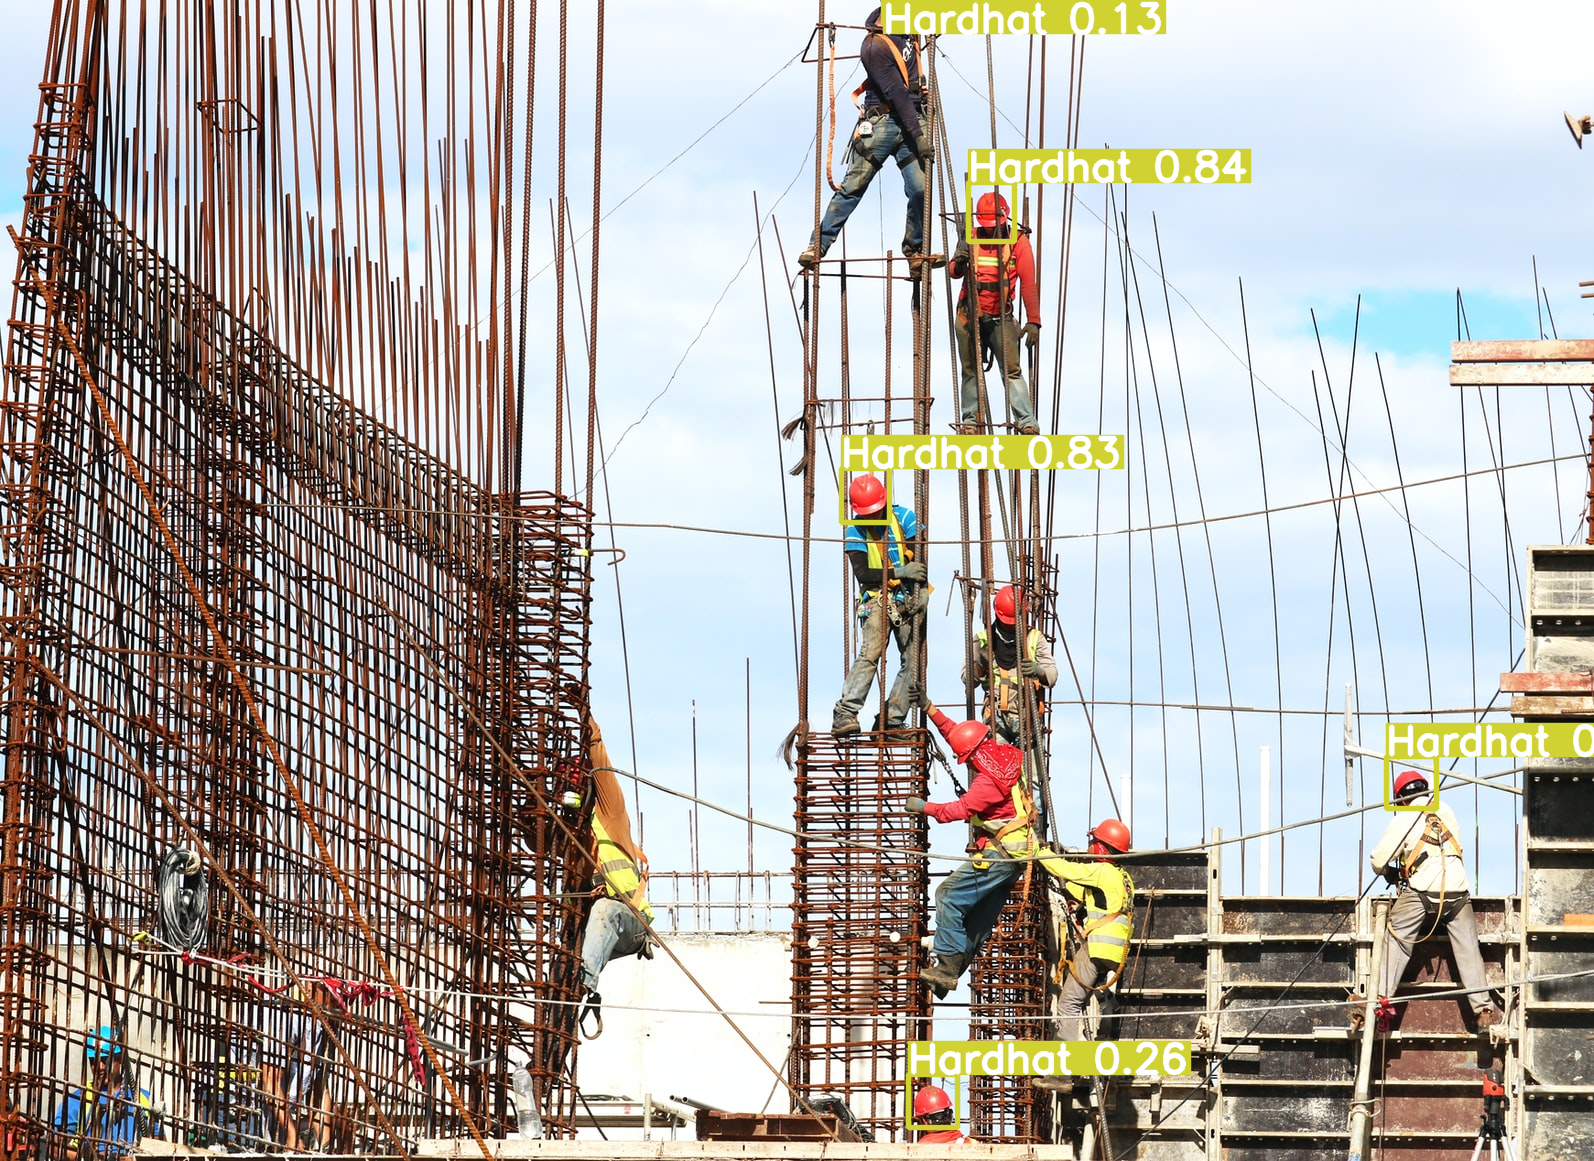

Saved 1 image to results11


In [13]:
import yolov5

# load model
model = yolov5.load('keremberke/yolov5m-construction-safety')

# set model parameters
model.conf = 0.05  # NMS confidence threshold
model.iou = 0.05  # NMS IoU threshold
model.agnostic = False  # NMS class-agnostic
model.multi_label = False  # NMS multiple labels per box
model.max_det = 1000  # maximum number of detections per image

# set image
img = '/content/photo-1531834685032-c34bf0d84c77.jpeg'

# perform inference
results = model(img, size=640)

# inference with test time augmentation
results = model(img, augment=True)

# parse results
predictions = results.pred[0]
boxes = predictions[:, :4] # x1, y1, x2, y2
scores = predictions[:, 4]
categories = predictions[:, 5]

# show detection bounding boxes on image
results.show()

# save results into "results/" folder
results.save(save_dir='results/')

